<a href="https://colab.research.google.com/github/subhadrastudent/AICTE_2025_Internship/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [01:42<00:00, 104MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [3]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [4]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


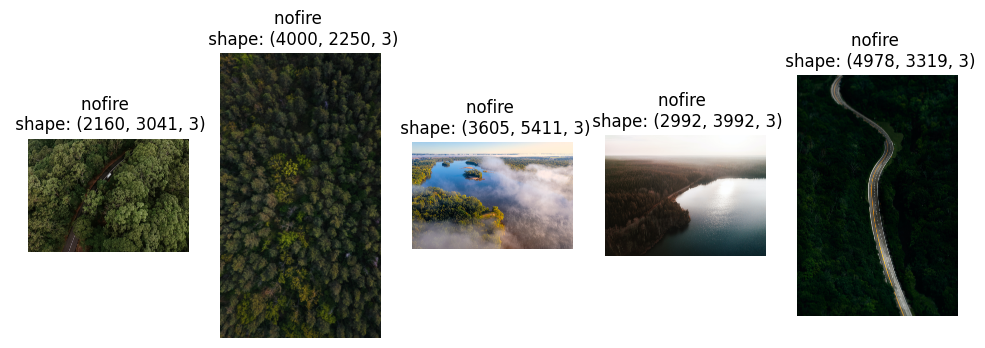

In [5]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


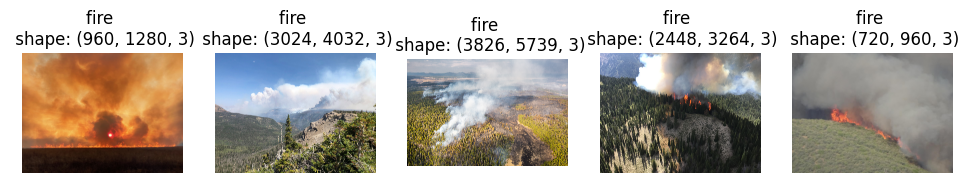

In [6]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [8]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'

# Data Augmentation (Minimal for Speed)
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(160, 160), batch_size=16, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(160, 160), batch_size=16, class_mode='categorical')

# Load MobileNetV2 (Lighter & Faster)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False  # Freeze for fast training

# Add Classification Head
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (Fewer epochs for speed)
model.fit(train_generator, validation_data=val_generator, epochs=5)

# Save the model
model.save("fast_wildfire_model.h5")


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
 99/118 ━━━━━━━━━━━━━━━━━━━━ 1:16 4s/step - accuracy: 0.6685 - loss: 0.6226

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


101/118 ━━━━━━━━━━━━━━━━━━━━ 1:09 4s/step - accuracy: 0.6703 - loss: 0.6201

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


118/118 ━━━━━━━━━━━━━━━━━━━━ 638s 5s/step - accuracy: 0.6842 - loss: 0.6004 - val_accuracy: 0.8209 - val_loss: 0.4100
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 570s 5s/step - accuracy: 0.8271 - loss: 0.3663 - val_accuracy: 0.8632 - val_loss: 0.3681
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 618s 5s/step - accuracy: 0.8680 - loss: 0.3162 - val_accuracy: 0.8706 - val_loss: 0.3455
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 588s 5s/step - accuracy: 0.8825 - loss: 0.2798 - val_accuracy: 0.8706 - val_loss: 0.3319
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 581s 5s/step - accuracy: 0.8896 - loss: 0.2640 - val_accuracy: 0.8657 - val_loss: 0.3221


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


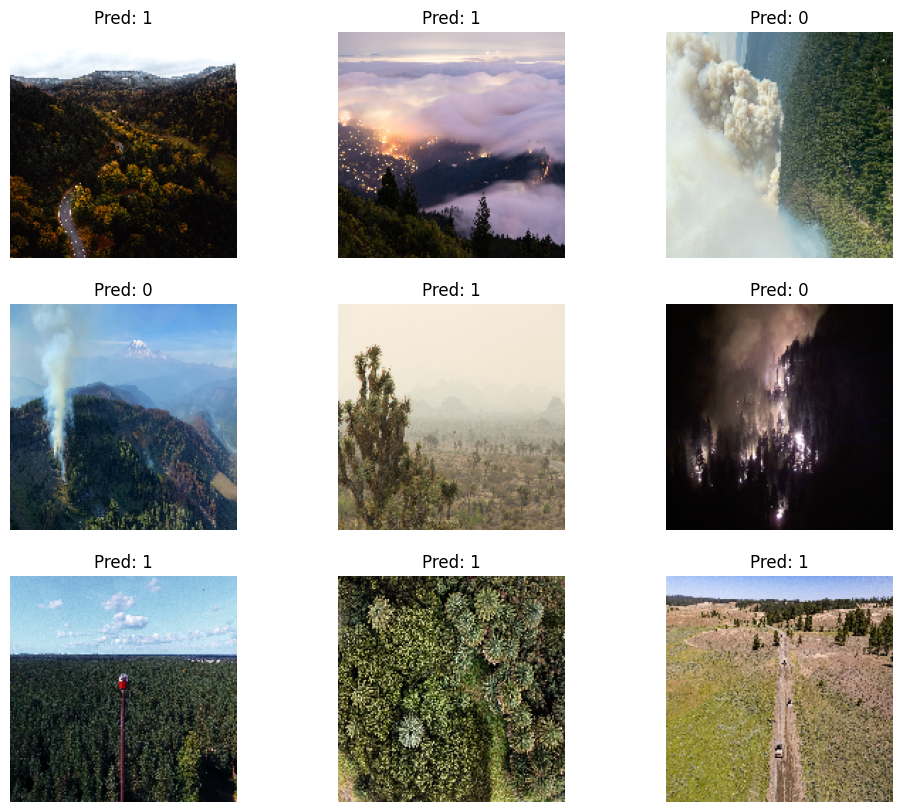

In [12]:
batch = next(val_generator)  # Get a batch of validation images
images, labels = batch

# Get model predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the images with their predicted labels
plt.figure(figsize=(12, 10))
for i in range(9):  # Show first 9 images
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Pred: {predicted_classes[i]}")
    plt.axis("off")
plt.show()
#Pred 0 is fire and Pred 1 is no fire